# EDA - Exploratory Data Analysis - Level 1
### Food Delivery Order History Data
### Dataset Link - https://www.kaggle.com/datasets/sujalsuthar/food-delivery-order-history-data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Loading the data from drive

In [3]:
order_history_df = pd.read_csv('/content/drive/MyDrive/order_history_kaggle_data.csv')

## Datasize Check

In [5]:
#Datasize
order_history_df.shape

(21321, 29)

## Sample

In [6]:
order_history_df.head(5)

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


## All columns

In [7]:
order_history_df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

## Null Values & Percentage at column level

----updated after feedback - 2

In [8]:
null_values = order_history_df.isnull().sum()
null_values_percentage = (null_values / len(order_history_df)) * 100
null_columns_data = pd.concat([null_values, null_values_percentage], axis=1)
null_columns_data.columns = ['Null_Counts', 'Percentage']
null_columns_data['Percentage'] = null_columns_data['Percentage'].map('{:.2f}%'.format)  # Format percentage
print("\nNull Columns Percentage:")
display(null_columns_data)


Null Columns Percentage:


,Null_Counts,Percentage
Restaurant ID,0,0.00%
Restaurant name,0,0.00%
Subzone,0,0.00%
City,0,0.00%
Order ID,0,0.00%
Order Placed At,0,0.00%
Order Status,0,0.00%
Delivery,0,0.00%
Distance,0,0.00%
Items in order,0,0.00%


## Categorical Columns unique values(less than 10 unique value columns)

In [12]:
#categorical unique values
categorical_cols = order_history_df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print("------"+str(col)+"------")
    print(f"{col}: {order_history_df[col].nunique()} unique values")
    if order_history_df[col].nunique() < 10:
        print(order_history_df[col].value_counts())
    print("-" * 50)


Unique values in categorical columns:
------Restaurant name------
Restaurant name: 6 unique values
Restaurant name
Aura Pizzas             14548
Swaad                    6332
Dilli Burger Adda         227
Tandoori Junction         154
The Chicken Junction       32
Masala Junction            28
Name: count, dtype: int64
--------------------------------------------------
------Subzone------
Subzone: 8 unique values
Subzone
Greater Kailash 2 (GK2)    7380
Sector 4                   6530
DLF Phase 1                3686
Sector 135                 2442
Vasant Kunj                 920
Shahdara                    360
Chittaranjan Park             2
Sikandarpur                   1
Name: count, dtype: int64
--------------------------------------------------
------City------
City: 1 unique values
City
Delhi NCR    21321
Name: count, dtype: int64
--------------------------------------------------
------Order Placed At------
Order Placed At: 19114 unique values
------------------------------------

Restaurant name: 6 unique values


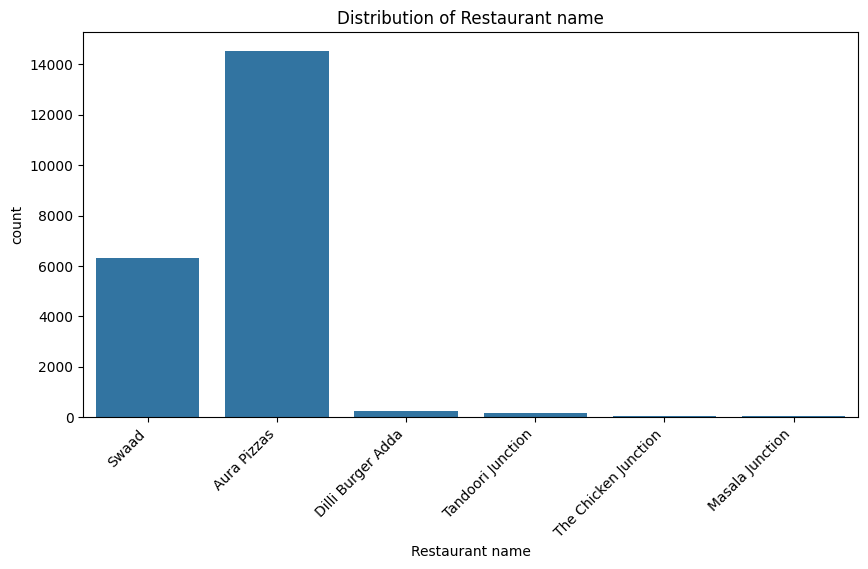

--------------------------------------------------
Subzone: 8 unique values


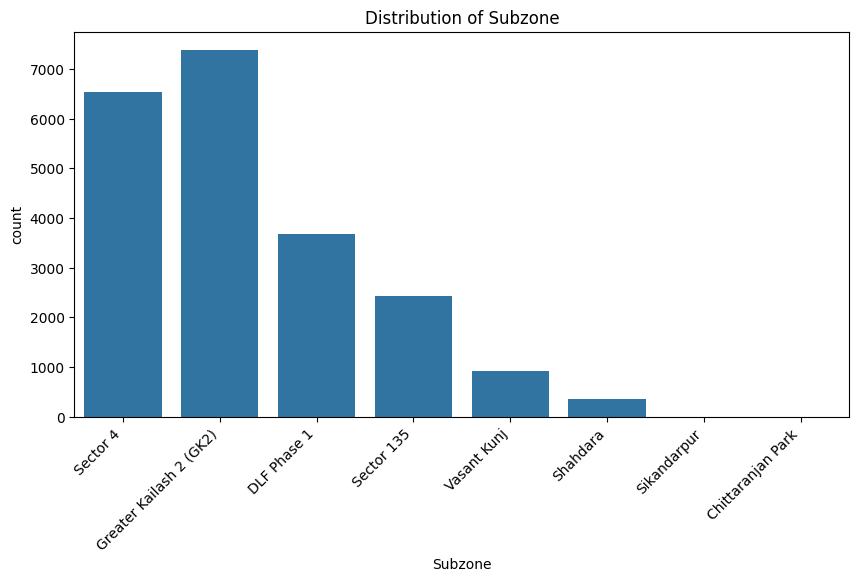

--------------------------------------------------
City: 1 unique values


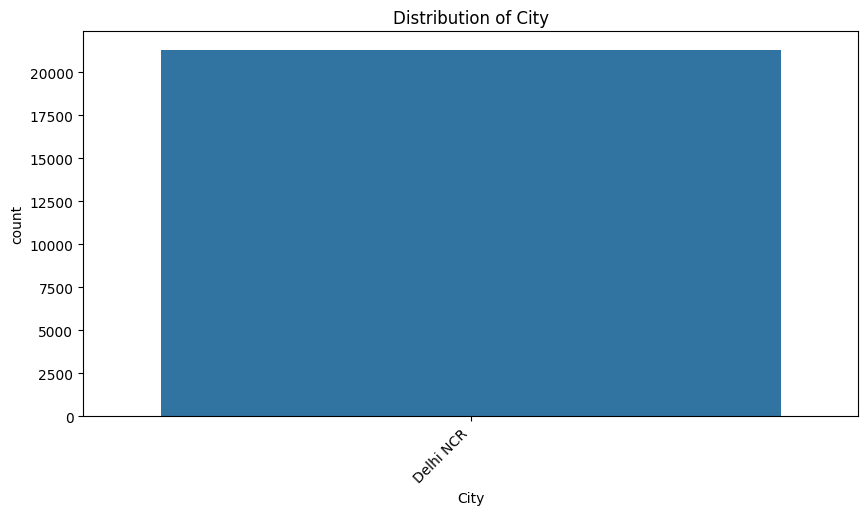

--------------------------------------------------
Order Placed At: 19114 unique values
Skipping plot for Order Placed At as it has more than 10 unique values.
--------------------------------------------------
Order Status: 6 unique values


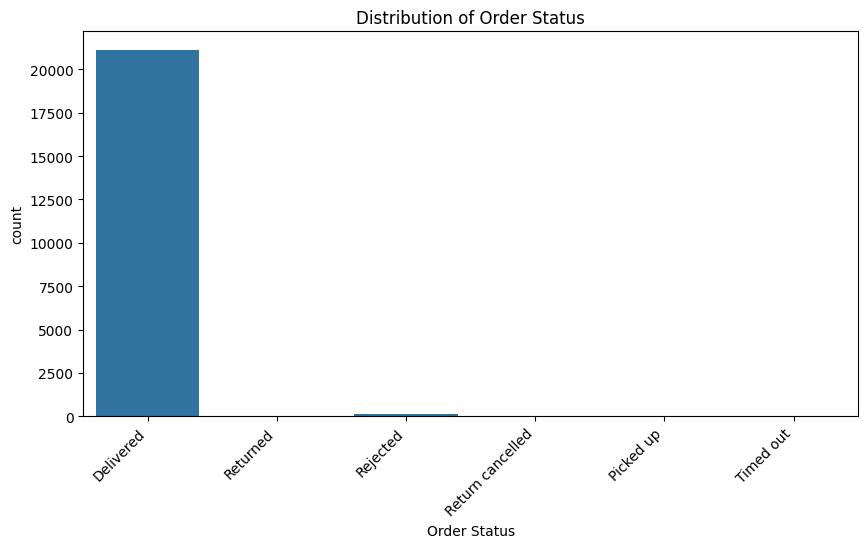

--------------------------------------------------
Delivery: 1 unique values


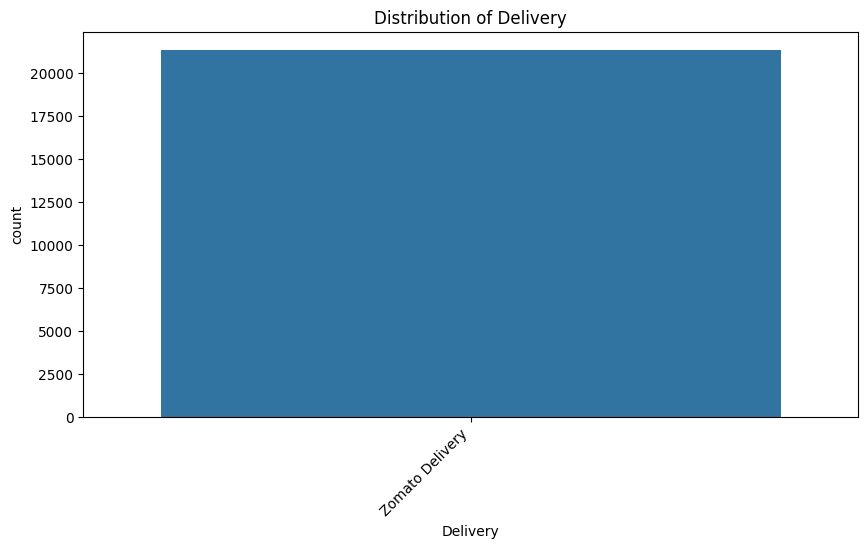

--------------------------------------------------
Distance: 22 unique values
Skipping plot for Distance as it has more than 10 unique values.
--------------------------------------------------
Items in order: 6123 unique values
Skipping plot for Items in order as it has more than 10 unique values.
--------------------------------------------------
Instructions: 631 unique values
Skipping plot for Instructions as it has more than 10 unique values.
--------------------------------------------------
Discount construct: 527 unique values
Skipping plot for Discount construct as it has more than 10 unique values.
--------------------------------------------------
Review: 293 unique values
Skipping plot for Review as it has more than 10 unique values.
--------------------------------------------------
Cancellation / Rejection reason: 5 unique values


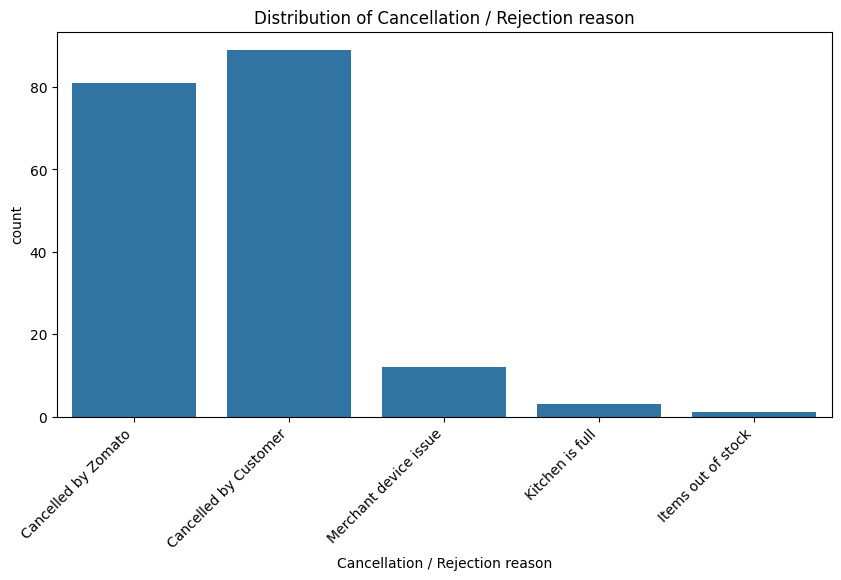

--------------------------------------------------
Order Ready Marked: 3 unique values


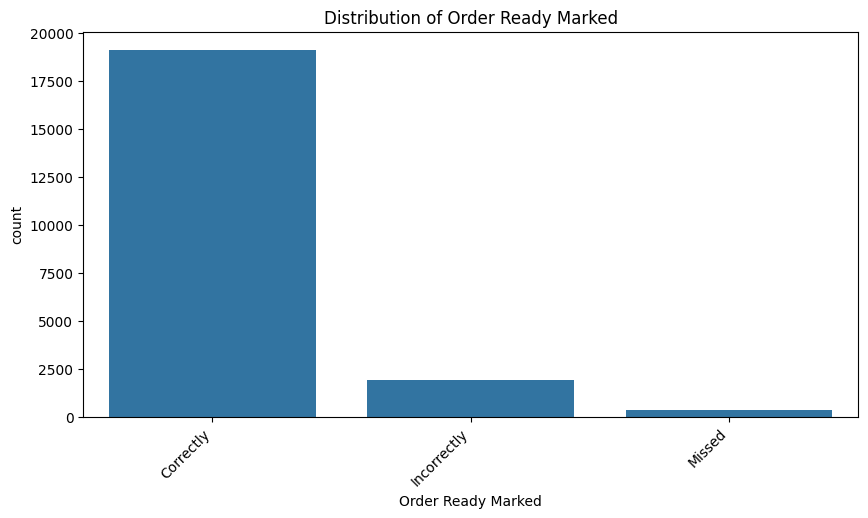

--------------------------------------------------
Customer complaint tag: 5 unique values


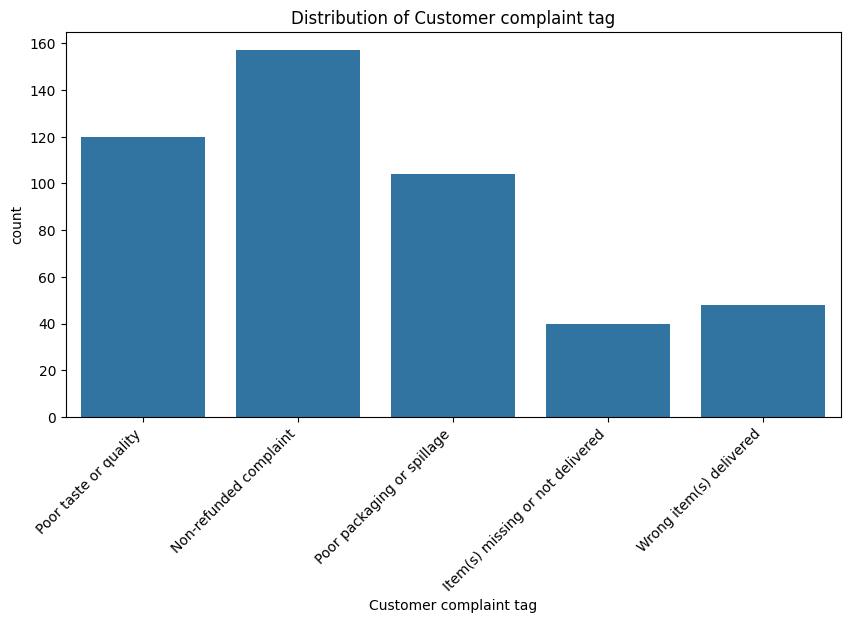

--------------------------------------------------
Customer ID: 11607 unique values
Skipping plot for Customer ID as it has more than 10 unique values.
--------------------------------------------------


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = order_history_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {order_history_df[col].nunique()} unique values")

    #plot for columns with less than 10 unique values
    if order_history_df[col].nunique() < 10:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=order_history_df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        print(f"Skipping plot for {col} as it has more than 10 unique values.")

    print("-" * 50)

## Refactoring column name

In [11]:

import re

def clean_column_names(df):
    existing_columns = df.columns
    new_columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col.replace(" ", "_").lower()) for col in existing_columns]
    new_columns = [re.sub(r'_{2,}', '_', col) for col in new_columns]
    new_columns = [col.rstrip('_') for col in new_columns]  # Remove trailing underscores
    df.columns = new_columns
    return df

order_history_df = clean_column_names(order_history_df)

In [12]:
order_history_df.columns

Index(['restaurant_id', 'restaurant_name', 'subzone', 'city', 'order_id',
       'order_placed_at', 'order_status', 'delivery', 'distance',
       'items_in_order', 'instructions', 'discount_construct', 'bill_subtotal',
       'packaging_charges', 'restaurant_discount_promo',
       'restaurant_discount_flat_offs_freebies_others', 'gold_discount',
       'brand_pack_discount', 'total', 'rating', 'review',
       'cancellation_rejection_reason', 'restaurant_compensation_cancellation',
       'restaurant_penalty_rejection', 'kpt_duration_minutes',
       'rider_wait_time_minutes', 'order_ready_marked',
       'customer_complaint_tag', 'customer_id'],
      dtype='object')

## Formating date column

In [13]:
from datetime import datetime

def convert_to_datetime(date_string):
    """Converts a date string in the format '1:38 PM, September 10 2024' to a datetime object."""
    try:
        return datetime.strptime(date_string, '%I:%M %p, %B %d %Y')
    except ValueError:
        print(f"Invalid date string format: {date_string}")
        return None

# Apply the function to the 'order_date' column
order_history_df['order_placed_at'] = order_history_df['order_placed_at'].apply(convert_to_datetime)

In [14]:
order_history_df.head(5)

,restaurant_id,restaurant_name,subzone,city,order_id,order_placed_at,order_status,delivery,distance,items_in_order,...,rating,review,cancellation_rejection_reason,restaurant_compensation_cancellation,restaurant_penalty_rejection,kpt_duration_minutes,rider_wait_time_minutes,order_ready_marked,customer_complaint_tag,customer_id
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,2024-09-10 23:38:00,Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,2024-09-10 23:34:00,Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,2024-09-10 15:52:00,Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,2024-09-10 15:45:00,Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,2024-09-10 15:04:00,Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


## Extraction of item counts from the items column

In [15]:
import re
import pandas as pd

def extract_item_count(items_str):
    """Extracts the total item count from a string like '2 x itemA, 1 x itemB'."""
    if pd.isna(items_str) or items_str == "":
        return 0

    # Find all patterns like "X x Item"
    matches = re.findall(r'(\d+)\s*x\s*', items_str, re.IGNORECASE)

    # Sum up all quantities, handling potential errors
    count = 0
    for match in matches:
        try:
            count += int(match)
        except ValueError:
            print(f"Warning: Could not convert '{match}' to an integer.")

    return count

order_history_df['item_count'] = order_history_df['items_in_order'].apply(extract_item_count)

## Generating total bill amount after discounts

--- just for exploring the total logic

In [50]:
def calculate_total_discount(row):
  """
  Calculates the total discount applied to an order, including all discount columns.

  Args:
    row: A row from the order_history_df_method2 DataFrame.

  Returns:
    The total discount amount.
  """
  total_discount = 0
  discount_columns = [
      'gold_discount',
      'restaurant_discount_promo',
      'restaurant_discount_flat_offs_freebies_others',
      'brand_pack_discount',
      'restaurant_compensation_cancellation' # Added this potential discount
  ]

  for col in discount_columns:
    if row[col] > 0:  # Check if the discount is greater than 0
        total_discount += row[col]

  return total_discount

# Apply the function to create a new 'total_discount' column
order_history_df['total_discount'] = order_history_df.apply(calculate_total_discount, axis=1)

In [51]:
import numpy as np
order_history_df['discount_flag'] = np.where(order_history_df['bill_subtotal'] > order_history_df['total_discount'], 1, 0)

In [52]:
filtered_df = order_history_df[order_history_df['discount_flag'] == 0]
filtered_df[['discount_flag', 'bill_subtotal', 'total_discount']]  # Replace with your desired columns

,discount_flag,bill_subtotal,total_discount
320,0,409.0,424.45


In [38]:
order_history_df['final_bill'] = (order_history_df['bill_subtotal'] + order_history_df['packaging_charges']) - order_history_df['total_discount']

In [54]:
order_history_df["discount_percentage"] = (order_history_df["total_discount"] / order_history_df["total"]) * 100
order_history_df['bill_subtotal'] = pd.to_numeric(order_history_df['bill_subtotal'], errors='coerce')
order_history_df['total_discount'] = pd.to_numeric(order_history_df['total_discount'], errors='coerce')


## Handling Missing values less than 500 counts

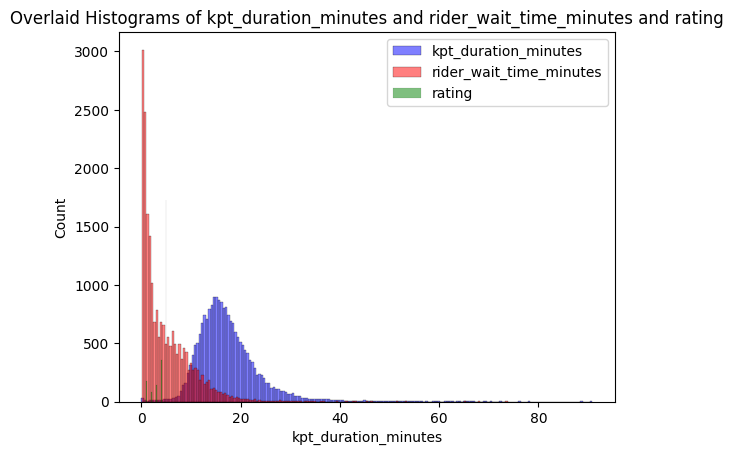

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=order_history_df, x='kpt_duration_minutes', color='blue', label='kpt_duration_minutes', alpha=0.5)
sns.histplot(data=order_history_df, x='rider_wait_time_minutes', color='red', label='rider_wait_time_minutes', alpha=0.5)
sns.histplot(data=order_history_df, x='rating', color='green', label='rating', alpha=0.5)
plt.title('Overlaid Histograms of kpt_duration_minutes and rider_wait_time_minutes and rating')
plt.legend()
plt.show()

<Axes: xlabel='rider_wait_time_minutes', ylabel='Count'>

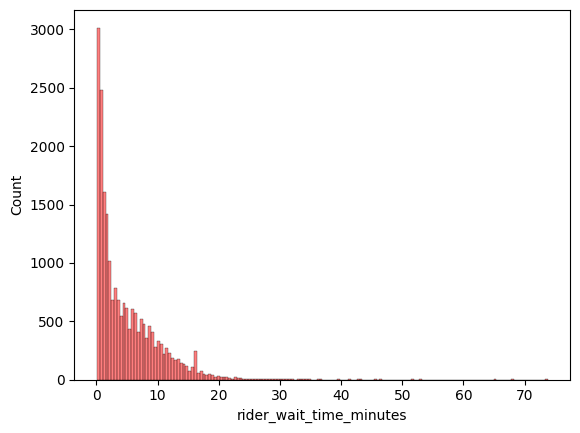

In [ ]:
sns.histplot(data=order_history_df, x='rider_wait_time_minutes', color='red', label='rider_wait_time_minutes', alpha=0.5)


<Axes: xlabel='rating', ylabel='Count'>

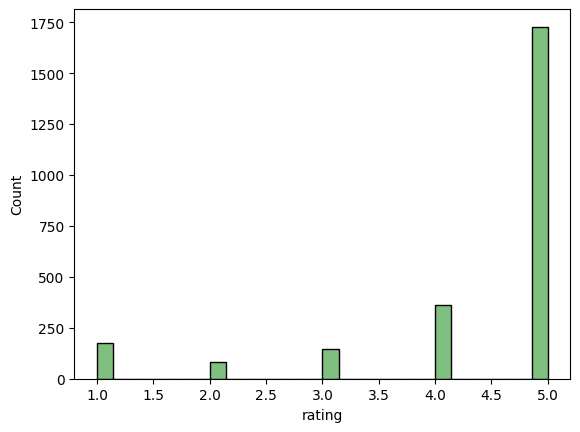

In [ ]:
sns.histplot(data=order_history_df, x='rating', color='green', label='rating', alpha=0.5)

<Axes: xlabel='kpt_duration_minutes', ylabel='Count'>

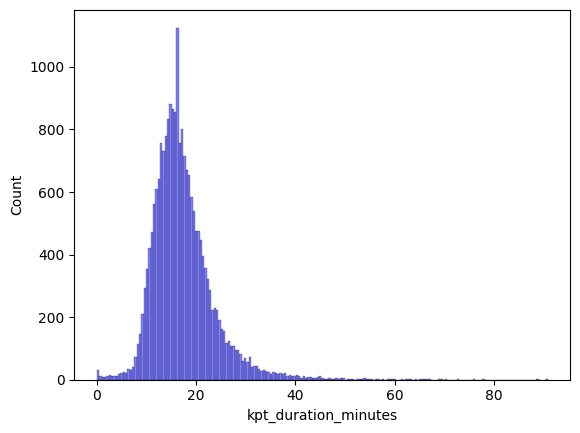

In [ ]:
sns.histplot(data=order_history_df, x='kpt_duration_minutes', color='blue', label='kpt_duration_minutes', alpha=0.5)

In [40]:
# Calculate the median of the specific column
kpt_duration_minutes_median = order_history_df['kpt_duration_minutes'].median()
print(kpt_duration_minutes_median)

# Replace null values in the specific column with the median
order_history_df['kpt_duration_minutes'] = order_history_df['kpt_duration_minutes'].fillna(kpt_duration_minutes_median)

16.33


In [41]:
# Calculate the median of the specific column
rider_wait_time_minutes_median = order_history_df['rider_wait_time_minutes'].median()
print(rider_wait_time_minutes_median)

# Replace null values in the specific column with the median
order_history_df['rider_wait_time_minutes'] = order_history_df['rider_wait_time_minutes'].fillna(rider_wait_time_minutes_median)

3.1


## Formating string(alphaets with numbers-->1km) distance column

In [16]:
def clean_distance(distance_str):
    if pd.isna(distance_str):
        return np.nan
    elif '<' in distance_str:
        return 0.5  # <1km means approximately 0.5km
    else:
        # Extract the numeric part
        return float(distance_str.replace('km', ''))

order_history_df['distance'] = order_history_df['distance'].apply(clean_distance)


## Filling categorical missing values

## Not executed at the moment --- after feedback -1

In [ ]:
categorical_cols = order_history_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    missing_count = order_history_df[col].isnull().sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")

Column 'instructions' has 20601 missing values.
Column 'discount_construct' has 5498 missing values.
Column 'review' has 21025 missing values.
Column 'cancellation_rejection_reason' has 21135 missing values.
Column 'customer_complaint_tag' has 20852 missing values.


In [ ]:
def fill_categorical_missing(df, column_name):
    """Fills missing values in a categorical column with 'No' + column name."""
    df[column_name] = df[column_name].fillna(f"No_{column_name}")
    return df

order_history_df = fill_categorical_missing(order_history_df, 'instructions')
order_history_df = fill_categorical_missing(order_history_df, 'discount_construct')
order_history_df = fill_categorical_missing(order_history_df, 'review')
order_history_df = fill_categorical_missing(order_history_df, 'cancellation_rejection_reason')
order_history_df = fill_categorical_missing(order_history_df, 'customer_complaint_tag')

## Outliers

In [44]:
numerical_cols = order_history_df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['restaurant_id', 'order_id', 'bill_subtotal', 'packaging_charges',
       'restaurant_discount_promo',
       'restaurant_discount_flat_offs_freebies_others', 'gold_discount',
       'brand_pack_discount', 'total', 'rating',
       'restaurant_compensation_cancellation', 'restaurant_penalty_rejection',
       'kpt_duration_minutes', 'rider_wait_time_minutes', 'item_count',
       'total_discount', 'discount_flag', 'final_bill', 'discount_percentage'],
      dtype='object')


### Method 1

In [46]:
import pandas as pd
import numpy as np

def find_outliers_per_column(df,columns):
    """
    Finds outliers in each column of a pandas DataFrame using the IQR method.
    Displays the outlier columns in the format: Column 'column_name': number outliers dropped.
    Includes a total outlier dropped count at the end.
    Provides a brief explanation of why outliers are dropped.
    Displays the dropped outlier data points for each column.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """

    df_clean = df.copy()
    total_dropped = 0  # Initialize total dropped count

    for col in columns_for_outlier:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identify and drop outliers
        outlier_indices = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
        num_outliers = len(outlier_indices)

        # Display dropped outliers for the current column
        if num_outliers > 0:
            print(f"Column '{col}': {num_outliers} outliers dropped.")
            print(f"  Reason: Outliers in '{col}' can significantly skew statistical analysis, affect model performance, and distort visualizations.")
            print("  Dropped Outliers:")
            print(df_clean.loc[outlier_indices, col])  # Display the dropped outlier values

        df_clean.drop(index=outlier_indices, inplace=True)
        total_dropped += num_outliers  # Accumulate total dropped count


    print(f"Total outliers dropped from DataFrame: {total_dropped}")  # Display total dropped count
    print("  Reason: Outliers can impact data analysis and model training by introducing bias or noise.")
    return df_clean



### Columns selection for dropping outliers
--- selected only few columns for outlier,like total","discount_percentage","bill_subtotal","rider_wait_time_minutes"

In [56]:
#Based on above observation removing outliers for few columns
columns_for_outlier=["total","discount_percentage","rider_wait_time_minutes","kpt_duration_minutes"]
order_history_df_method2 = find_outliers_per_column(order_history_df, columns_for_outlier)

Column 'total': 245 outliers dropped.
  Reason: Outliers in 'total' can significantly skew statistical analysis, affect model performance, and distort visualizations.
  Dropped Outliers:
399      2263.80
437      2442.30
520      2809.80
916      2579.85
1573     2243.85
          ...   
20884    2286.06
20948    2216.13
21150    3743.25
21159    4063.50
21235    3189.90
Name: total, Length: 245, dtype: float64
Column 'discount_percentage': 64 outliers dropped.
  Reason: Outliers in 'discount_percentage' can significantly skew statistical analysis, affect model performance, and distort visualizations.
  Dropped Outliers:
74       166.998464
320      130.821390
765      139.095581
1325     117.111111
1433     117.111111
            ...    
14375    166.981187
15149    103.031885
15962    110.722944
16447    134.360801
20203    148.957252
Name: discount_percentage, Length: 64, dtype: float64
Column 'rider_wait_time_minutes': 68 outliers dropped.
  Reason: Outliers in 'rider_wait_time_min

## Business Problem  - Predicting KPT duration by resturant

### Obeserving outliers from above outputs

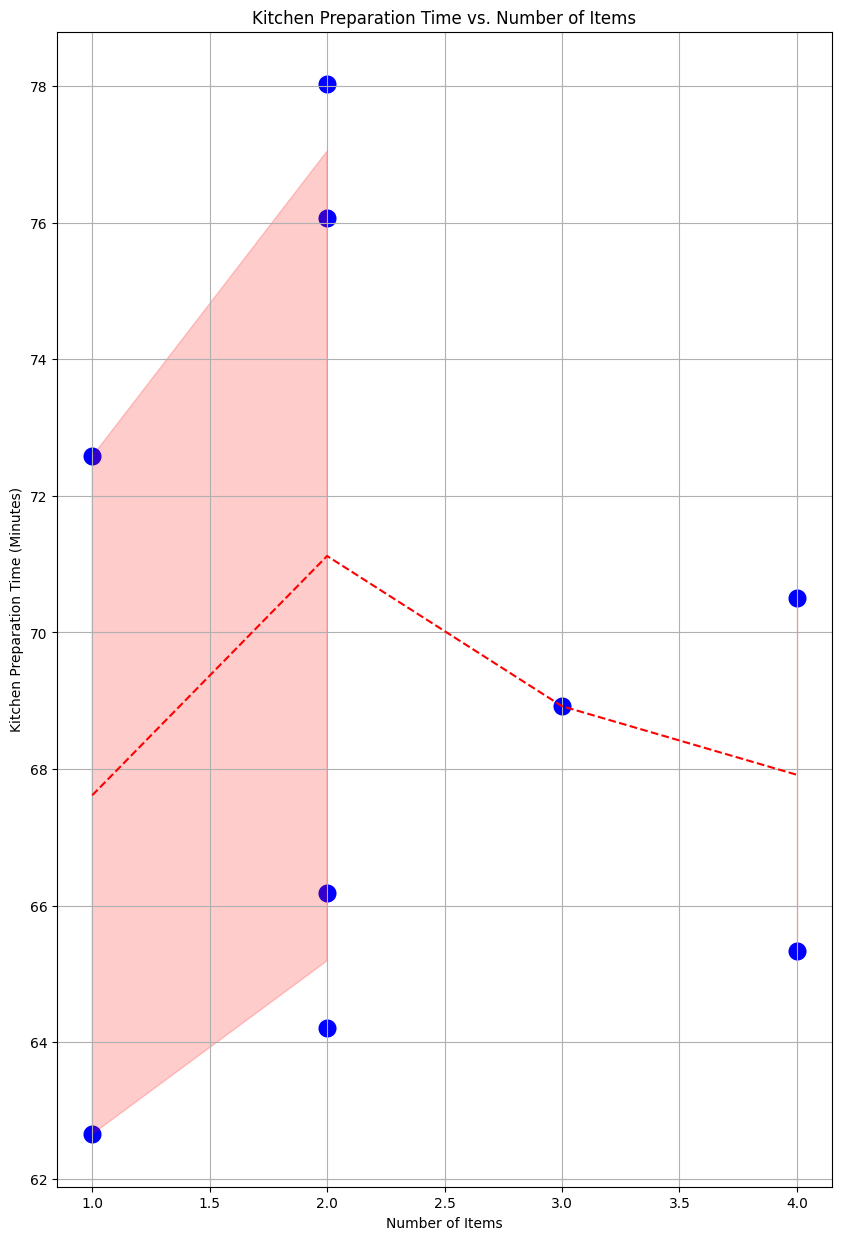

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

order_history_df_filter_2=order_history_df[(order_history_df['item_count'] <= 4) & (order_history_df['kpt_duration_minutes'] > 60)]
order_history_df_filter=order_history_df[(order_history_df['item_count'] <= 4) & (order_history_df['kpt_duration_minutes'] > 60) & (order_history_df['rider_wait_time_minutes'] > 15)]
# Plot
plt.figure(figsize=(10, 15))
sns.scatterplot(x=order_history_df_filter['item_count'], y=order_history_df_filter['kpt_duration_minutes'], color='blue', s=200)
sns.lineplot(x=order_history_df_filter['item_count'], y=order_history_df_filter['kpt_duration_minutes'], color='red', linestyle='dashed')

# Labels and Title
plt.xlabel("Number of Items")
plt.ylabel("Kitchen Preparation Time (Minutes)")
plt.title("Kitchen Preparation Time vs. Number of Items")
plt.grid(True)
plt.show()


In [58]:
order_history_df_filter_2[["item_count","items_in_order","kpt_duration_minutes","rider_wait_time_minutes"]]

,item_count,items_in_order,kpt_duration_minutes,rider_wait_time_minutes
2387,1,1 x Jamaican Chicken Melt,65.63,2.9
2389,1,1 x Bageecha Pizza,66.45,4.1
2390,2,"1 x Fried Chicken Strips, 1 x Jamaican Chicken...",76.07,28.1
2391,3,"1 x Chilli Cheese Garlic Bread, 1 x Fried Chic...",66.87,9.0
2392,2,2 x Just Pepperoni Pizza,78.03,42.6
2471,1,1 x Fried Chicken Classic Tender,62.33,10.9
2797,1,1 x Chicken 65 Grilled Chicken Tangdi (4pcs),62.65,34.9
7410,4,"2 x Murgh Amritsari Seekh Pide, 1 x Mutton See...",65.33,28.6
16025,2,"1 x Bageecha Pizza, 1 x Makhani Paneer Pizza",64.20,45.4
16029,3,"1 x Cheesy Garlic Bread, 1 x Just Pepperoni Pi...",68.92,39.7


# Baselining
-- without dropping outliers

### Sample Mean Baselining
--- as suggested during session

In [35]:
baseline_kpt = order_history_df['kpt_duration_minutes'].mean()
order_history_df['baseline_prediction_mean'] = baseline_kpt

### Sample Median Baselining

In [36]:
baseline_kpt = order_history_df['kpt_duration_minutes'].median()
order_history_df['baseline_prediction_median'] = baseline_kpt

### Baselining per resturant

In [72]:
order_history_df['baseline_prediction_per_restaurant'] = order_history_df.groupby('restaurant_name')['kpt_duration_minutes'].transform('mean')

### Baseling per area

In [71]:
order_history_df['baseline_prediction_per_subzon'] = order_history_df.groupby(['restaurant_name','subzone'])['kpt_duration_minutes'].transform('mean')

In [91]:
order_history_df['baseline_prediction_last_kpt'] = order_history_df.groupby(['restaurant_name','subzone'])['kpt_duration_minutes'].shift(1)
order_history_drop_na_last_orders=order_history_df.dropna(subset=['baseline_prediction_last_kpt'])##dropping nullvalues because there is no previous orders


### Baseline metrics from above baselining

In [92]:
from sklearn.metrics import mean_absolute_error

mae_mean = mean_absolute_error(order_history_df['kpt_duration_minutes'], order_history_df['baseline_prediction_mean'])
print(f'Baseline Mean MAE: {mae_mean:.2f} minutes')

mae_median = mean_absolute_error(order_history_df['kpt_duration_minutes'], order_history_df['baseline_prediction_median'])
print(f'Baseline Median MAE: {mae_median:.2f} minutes')

mae_mean_rest = mean_absolute_error(order_history_df['kpt_duration_minutes'], order_history_df['baseline_prediction_per_restaurant'])
print(f'Baseline Mean Per restaurant: {mae_mean_rest:.2f} minutes')

mae_mean_subzone = mean_absolute_error(order_history_df['kpt_duration_minutes'], order_history_df['baseline_prediction_per_subzon'])
print(f'Baseline Mean Per Subzon MAE: {mae_mean_subzone:.2f} minutes')

mae_mean_subzone_last_order = mean_absolute_error(order_history_drop_na_last_orders['kpt_duration_minutes'], order_history_drop_na_last_orders['baseline_prediction_last_kpt'])
print(f'Baseline Mean Per Subzon last order MAE: {mae_mean_subzone_last_order:.2f} minutes')

Baseline Mean MAE: 4.43 minutes
Baseline Median MAE: 4.34 minutes
Baseline Mean Per restaurant: 4.40 minutes
Baseline Mean Per Subzon MAE: 4.31 minutes
Baseline Mean Per Subzon last order MAE: 5.10 minutes


In [84]:
order_history_driop_na_last_orders

In [ ]:
|